In [ ]:
# Multiple Linear Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/CSV/50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
onehotencorder = OneHotEncoder(categories='auto', sparse=False)
#onehotencoder = OneHotEncoder(categorical_features = [3])
#X = onehotencoder.fit_transform(X).toarray()
X = onehotencorder.fit_transform(X)

# Avoiding the Dummy Variable Trap
X = X[:, 1:]

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
Z=(y_pred-y_test)
print(Z)

[ 7.13887993e+03 -4.46243268e+04 -3.57006901e+04  3.26224299e+04
 -8.06291301e+04  1.48210860e+04  3.86003360e+04  2.23458360e+04
  6.90099330e+01 -5.57666801e+04]


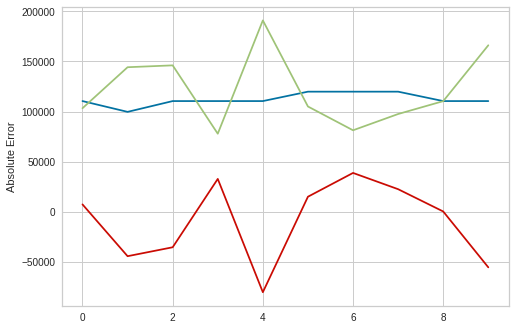

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_pred)
plt.plot(y_test)
plt.plot((Z))
plt.ylabel('Absolute Error')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


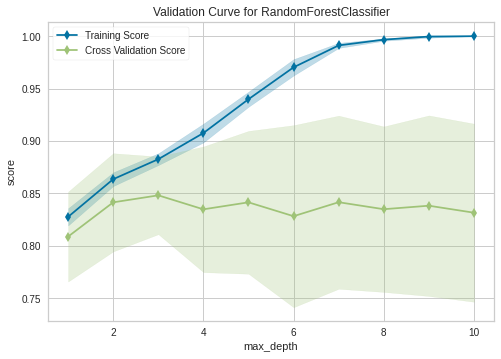

AxesSubplot(0.125,0.125;0.775x0.755)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import validation_curve 

df = pd.read_csv("/content/drive/MyDrive/CSV/heart.csv") # Loading the data
df = shuffle(df, random_state=3) # Shuffling the data

X = df.iloc[:,:-1] # Feature matrix in pd.DataFrame format
y = df.iloc[:,-1] # Target vector in pd.Series format

# Making a Random Forest Classifier object
rf = RandomForestClassifier(n_estimators=100, criterion='gini',
                           max_depth=None, n_jobs=-1, random_state=42)

# Plot the validation curve
print(validation_curve(rf, X, y, param_name="max_depth", n_jobs=-1,
      param_range=np.arange(1, 11), cv=10, scoring="accuracy"))